# Tarefa 1 - Algoritmo K-Nearest-Neighbors
### Aluno: José Ivo Schwade Araújo

Importando as bibliotecas necessárias:

In [ ]:
# importar os pandas para armazenar os dados em dataframes
import pandas as pd
# o numpy é utilizado para realizar algumas operações em dados
import numpy as np
# a funcao train_test_split é usada para dividir o conjunto de dados em treino e teste
import seaborn as sns

from sklearn.model_selection import train_test_split
# essas duas funcoes sao usadas para analisar os resultados
from sklearn.metrics import classification_report, accuracy_score
# esse pacote contém um conjunto de datasets prontos para serem utilizados
from sklearn import datasets
# Esse pacote contém métodos de normalização de atributos
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# importa o knn
from sklearn.neighbors import KNeighborsClassifier
# para visualizar dados
import matplotlib.pyplot as plt

Carregando e visualizando nossa base de dados:

In [9]:
wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

df.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


Visualizando as estatísticas descritivas:

In [10]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

Separando a base de dados em um conjunto de treinamento e um conjunto de teste:

In [74]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (90, 4)
X_test: (60, 4)
y_train: (90,)
y_test: (60,)


Vamos calcular agora as acurácias para valores k de 1 a 11 usando as distâncias *euclidian*, *cityblock* e *chebyshev*

In [75]:
# Normalizamos os atributos de X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Calculando para cada K e cada distância:

resultados = []

for distance in ['euclidean', 'cityblock', 'chebyshev']:
    for k in range(1,12):
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        knn.fit(X_train, y_train)
        Y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, Y_pred)
        resultados.append({'k': k, 'distance': distance, 'accuracy': accuracy})

display(resultados)

[{'k': 1, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 2, 'distance': 'euclidean', 'accuracy': 0.8666666666666667},
 {'k': 3, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 4, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 5, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 6, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 7, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 8, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 9, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 10, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 11, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 1, 'distance': 'cityblock', 'accuracy': 0.9},
 {'k': 2, 'distance': 'cityblock', 'accuracy': 0.8666666666666667},
 {'k': 3, 'distance': 'cityblock', 'accuracy': 0.95},
 {'k': 4, 'distance': 'cityblock', 'accuracy': 0.9166666666666666},
 {'k': 

Verificando a variação da acurácia com o parâmetro K:

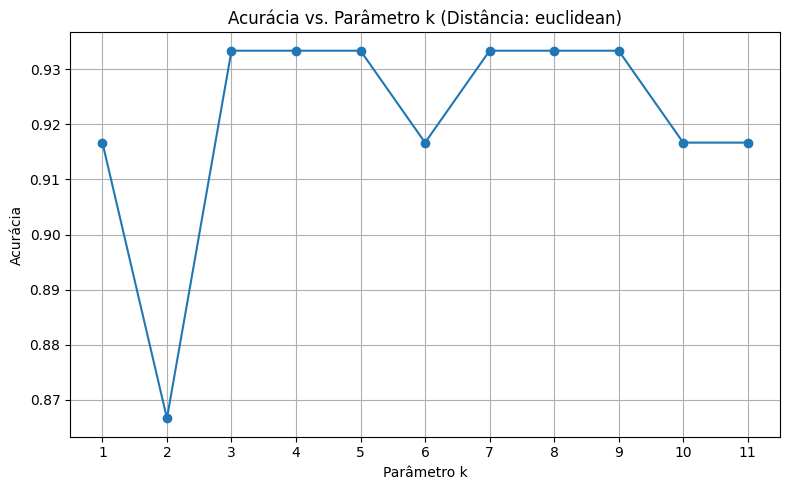

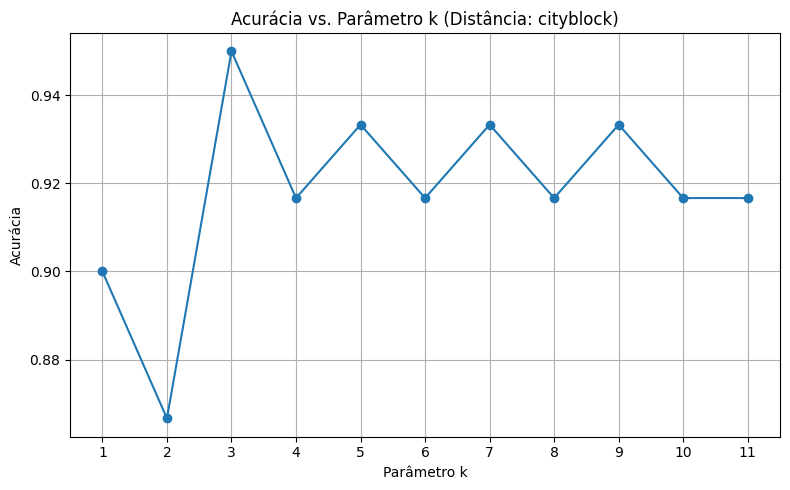

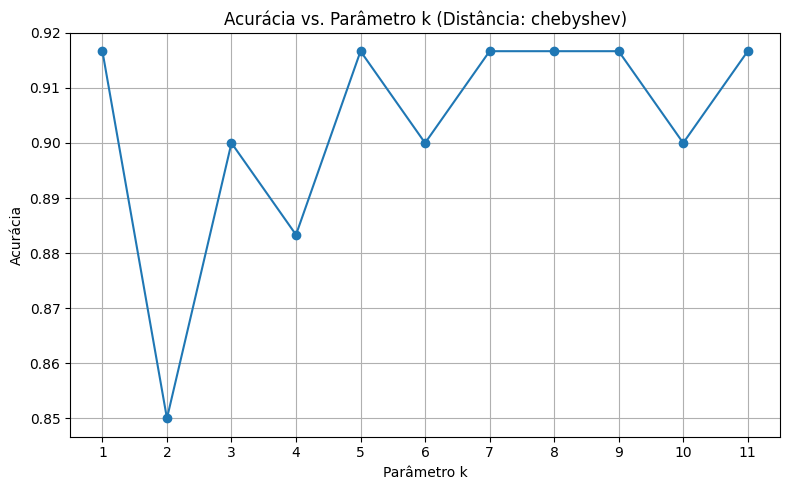

In [76]:
df_resultados = pd.DataFrame(resultados)

# Plotando
distancias = df_resultados['distance'].unique()

for distance in distancias:
    subset = df_resultados[df_resultados['distance'] == distance]
    
    plt.figure(figsize=(8, 5))
    plt.plot(subset['k'], subset['accuracy'], marker='o')
    plt.xticks(np.arange(1, 12))
    plt.xlabel('Parâmetro k')
    plt.ylabel('Acurácia')
    plt.title(f'Acurácia vs. Parâmetro k (Distância: {distance})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

O melhor modelo é, aparentemente, utilizando a distância *cityblock* e parâmetro k = 3.

In [77]:
melhor_modelo = df_resultados.loc[df_resultados['accuracy'].idxmax()]
print("Melhor modelo encontrado:")
print(melhor_modelo)

Melhor modelo encontrado:
k                   3
distance    cityblock
accuracy         0.95
Name: 13, dtype: object


Treinando o modelo:

In [78]:
melhor_k = melhor_modelo["k"]
melhor_distancia = melhor_modelo["distance"]
knn = KNeighborsClassifier(n_neighbors=melhor_k, metric=melhor_distancia)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.96      0.94        23
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



Plotando a matriz de confusão:

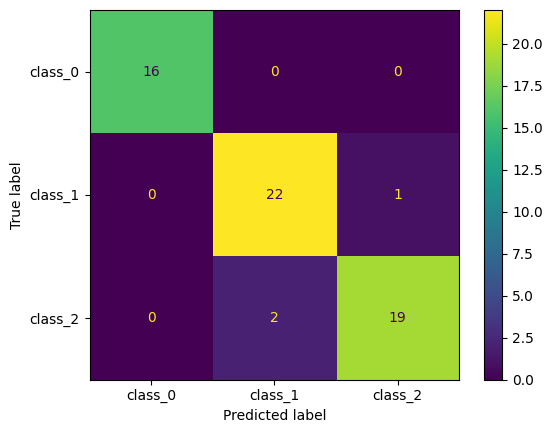

In [79]:
# importa uma função para melhor visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(wine.target_names))
# plota a matriz de confusão
cmd.plot()
plt.show()

Aplicando ambas normalizações e treinando o modelo novamente:

In [80]:
# Normalizamos os atributos de X
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Calculando para cada K e cada distância:

resultados = []

for distance in ['euclidean', 'cityblock', 'chebyshev']:
    for k in range(1,12):
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        knn.fit(X_train, y_train)
        Y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, Y_pred)
        resultados.append({'k': k, 'distance': distance, 'accuracy': accuracy})

display(resultados)

[{'k': 1, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 2, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 3, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 4, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 5, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 6, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 7, 'distance': 'euclidean', 'accuracy': 0.9333333333333333},
 {'k': 8, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 9, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 10, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 11, 'distance': 'euclidean', 'accuracy': 0.9166666666666666},
 {'k': 1, 'distance': 'cityblock', 'accuracy': 0.9166666666666666},
 {'k': 2, 'distance': 'cityblock', 'accuracy': 0.8833333333333333},
 {'k': 3, 'distance': 'cityblock', 'accuracy': 0.9166666666666666},
 {'k': 4, 'distance': 'cityblock', 'accuracy':

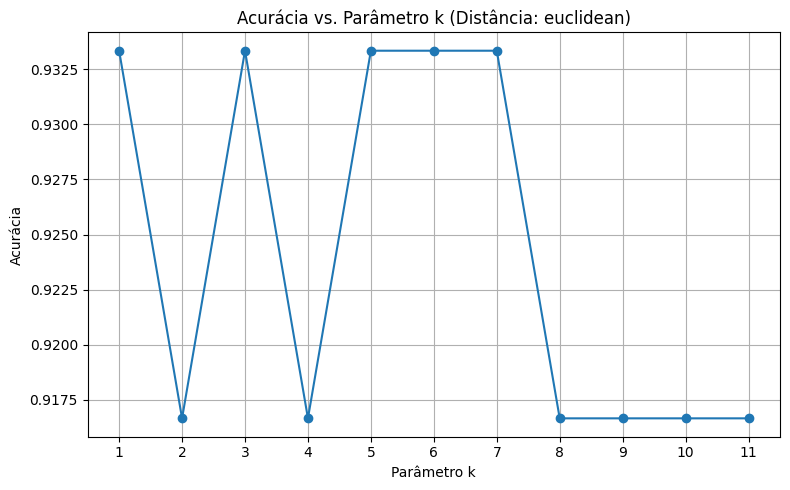

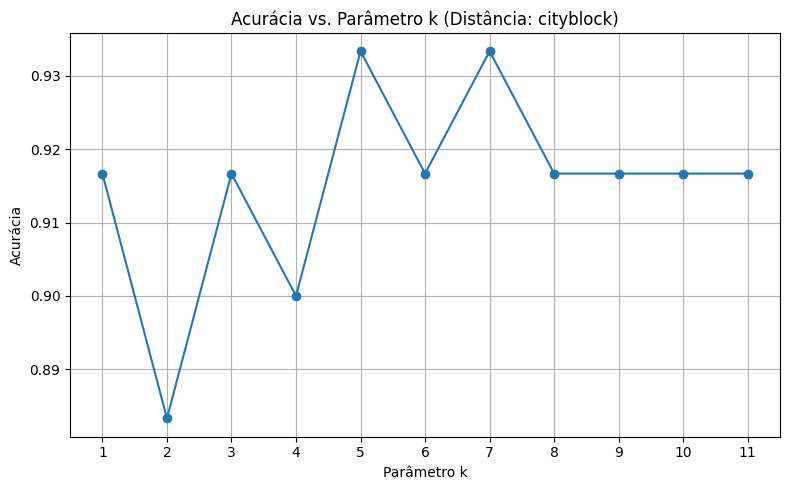

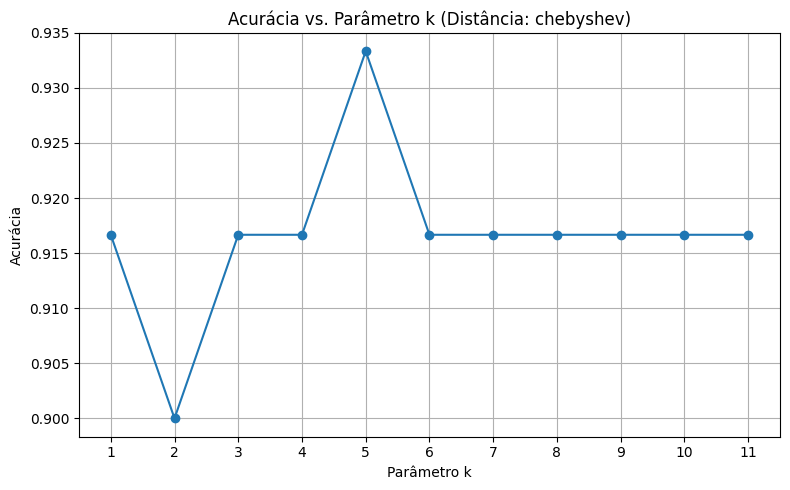

In [81]:
df_resultados = pd.DataFrame(resultados)

# Plotando
distancias = df_resultados['distance'].unique()

for distance in distancias:
    subset = df_resultados[df_resultados['distance'] == distance]
    
    plt.figure(figsize=(8, 5))
    plt.plot(subset['k'], subset['accuracy'], marker='o')
    plt.xticks(np.arange(1, 12))
    plt.xlabel('Parâmetro k')
    plt.ylabel('Acurácia')
    plt.title(f'Acurácia vs. Parâmetro k (Distância: {distance})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [82]:
melhor_modelo = df_resultados.loc[df_resultados['accuracy'].idxmax()]
print("Melhor modelo encontrado:")
print(melhor_modelo)

Melhor modelo encontrado:
k                   1
distance    euclidean
accuracy     0.933333
Name: 0, dtype: object


In [83]:
melhor_k = melhor_modelo["k"]
melhor_distancia = melhor_modelo["distance"]
knn = KNeighborsClassifier(n_neighbors=melhor_k, metric=melhor_distancia)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        23
           2       1.00      0.81      0.89        21

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



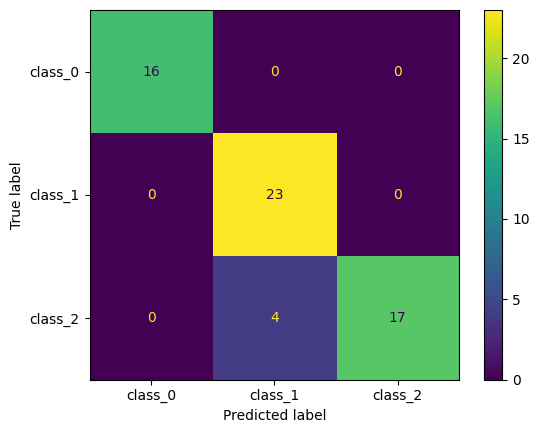

In [84]:
# importa uma função para melhor visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(wine.target_names))
# plota a matriz de confusão
cmd.plot()
plt.show()

## Conclusão

Podemos concluir que o melhor modelo é o primeiro, utilizando a normalização StandardScaler, a distância *cityblock* e o parâmetro k = 3, devido a sua menor quantidade de erros analisada na matriz de confusão.